In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import lightkurve as lk
from astropy.modeling import models, fitting
from astropy.convolution import convolve, Box1DKernel


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20


In [2]:
# rates = Table.read('../tables/pceb_fit_results_rates.csv')
# names = rates['Target']
# names
coords = np.genfromtxt('../coords_deg_periods.tsv', delimiter='\t', names=True, dtype=None, encoding=None)
ra, dec = coords['RA'], coords['DEC']
# coords
coords.dtype.names

('Name', 'RA', 'DEC', 'Period_d')

In [3]:
for i, star in enumerate(coords['Name']):
    print(star)
    search_result = lk.search_lightcurve('{} {}'.format(ra[i], dec[i]))
    print(search_result)
    

UZ Sex
SearchResult containing 3 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 35 2021    QLP     600     7983187      0.0
  1 TESS Sector 45 2021   SPOC     120     7983187      0.0
  2 TESS Sector 46 2021   SPOC     120     7983187      0.0
CC Cet
SearchResult containing 9 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 31 2020      SPOC      20   337219837      0.0
  1 TESS Sector 31 2020      SPOC     120   337219837      0.0
  2 TESS Sector 31 2020 TESS-SPOC     600   337219837      0.0
  3 TESS Sector 42 2021      SPOC      20   337219837      0.0
  4 TESS Sector 42 2021      SPOC     120   337219837      0.0
  5 TESS Sector 43 2021      SPOC     

No data found for target "225.0805225 16.98727937".


SearchResult containing 0 data products.
WD 1504+546


No data found for target "226.5225344 54.47185058".


SearchResult containing 0 data products.
WD 2317+268


No data found for target "350.0169884 27.10657437".


SearchResult containing 0 data products.
V727 Car
SearchResult containing 3 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 11 2019   SPOC     120   398365709      0.0
  1 TESS Sector 37 2021   SPOC     120   398365709      0.0
  2 TESS Sector 38 2021   SPOC     120   398365709      0.0
WD 0137-349
SearchResult containing 6 data products.

 #     mission     year   author  exptime target_name distance
                                     s                 arcsec 
--- -------------- ---- --------- ------- ----------- --------
  0 TESS Sector 03 2018      SPOC     120    32307067      0.0
  1 TESS Sector 03 2018 TESS-SPOC    1800    32307067      0.0
  2 TESS Sector 03 2018     TASOC     120    32307067      0.0
  3 TESS Sector 30 2020      SPOC      20    32307067      0.0
  4 TESS Sector 30 2020      SPOC     120    32307067

No data found for target "344.7011951 25.26188584".


SearchResult containing 0 data products.
WD2257+162


No data found for target "344.9450586 16.48791373".


SearchResult containing 0 data products.
QS Vir


No data found for target "207.466864 -13.22686755".


SearchResult containing 0 data products.


UZ Sex


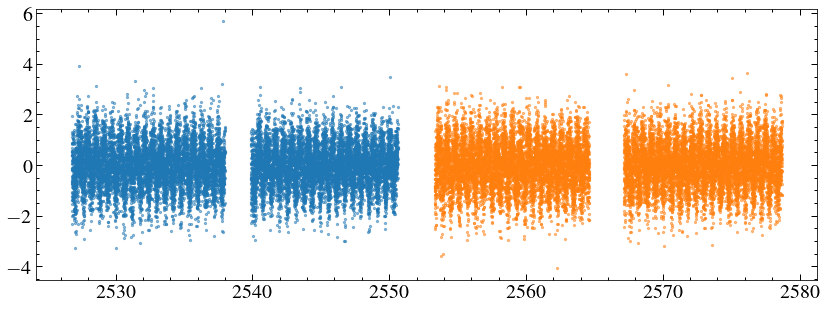

/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:486: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


14.346931401341326 h
0.5977888083892219 d


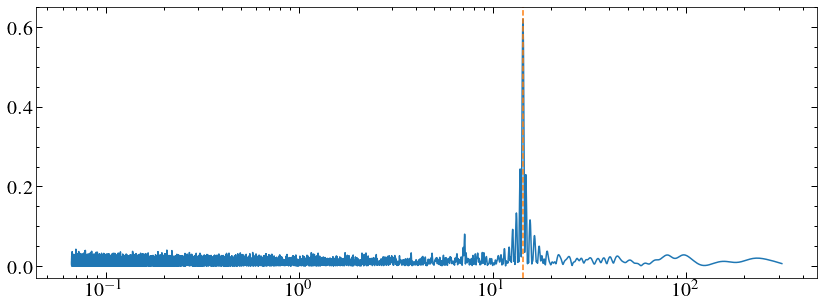

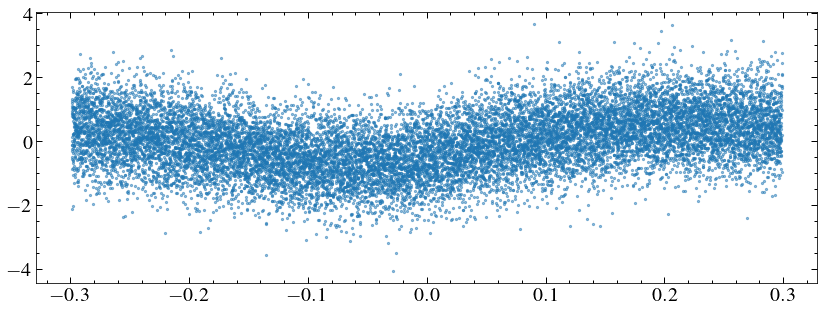

CC Cet


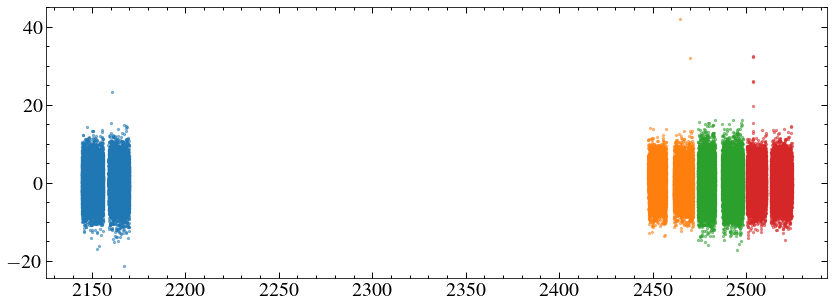

6.883461605242495 h
0.2868109002184373 d


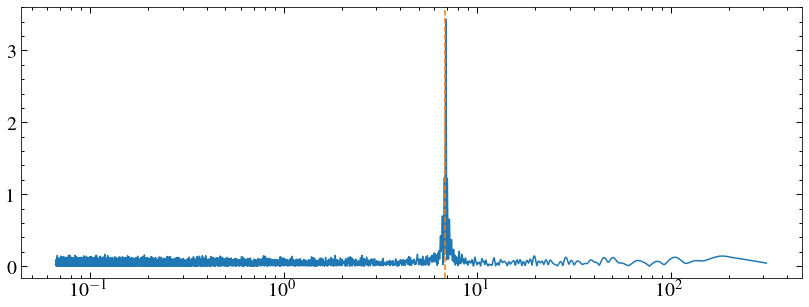

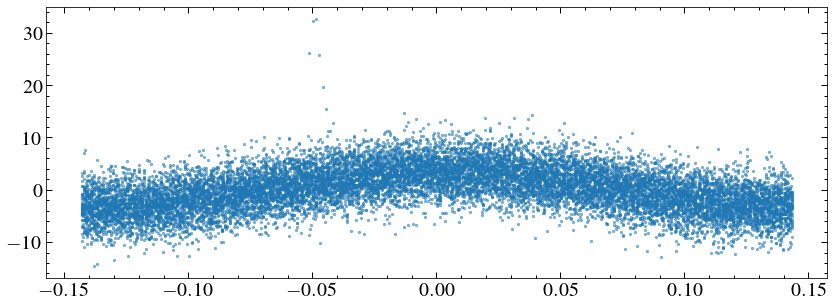

LM com


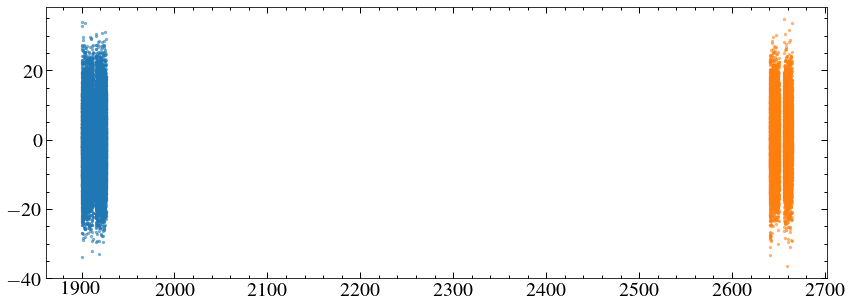

6.20945817959689 h
0.25872742414987043 d


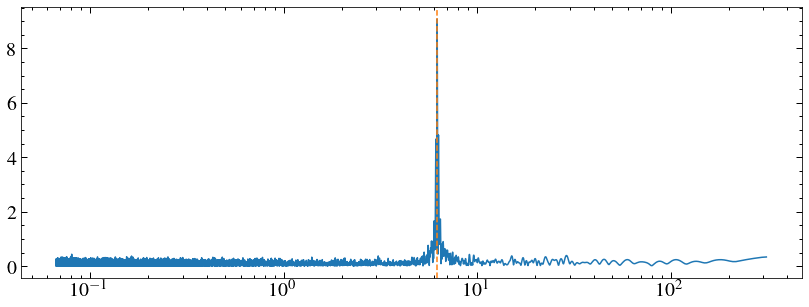

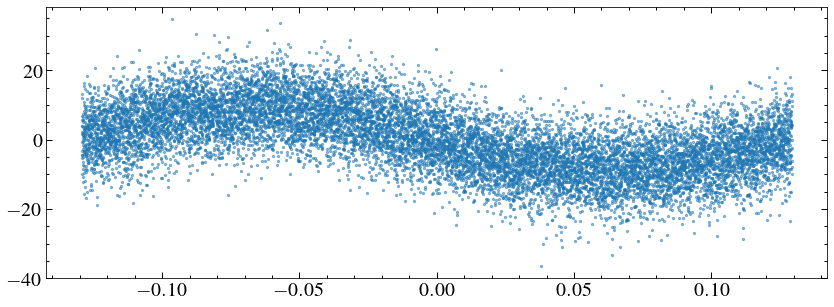

EG Uma


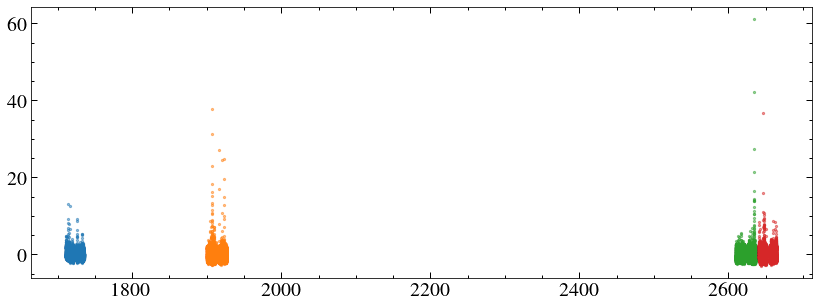

16.011905790261736 h
0.6671627412609057 d


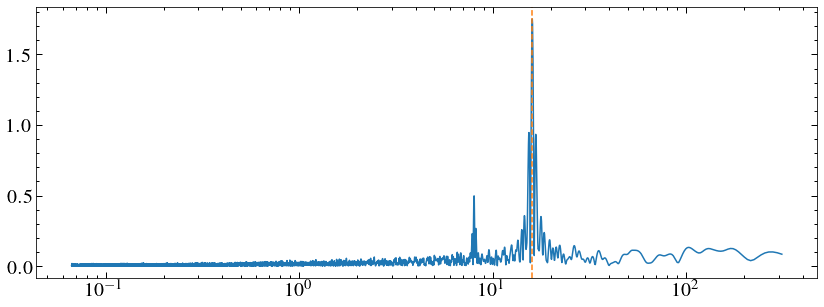

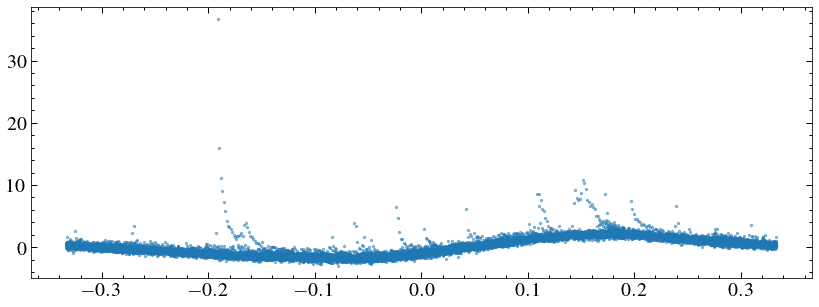

EGGR 38


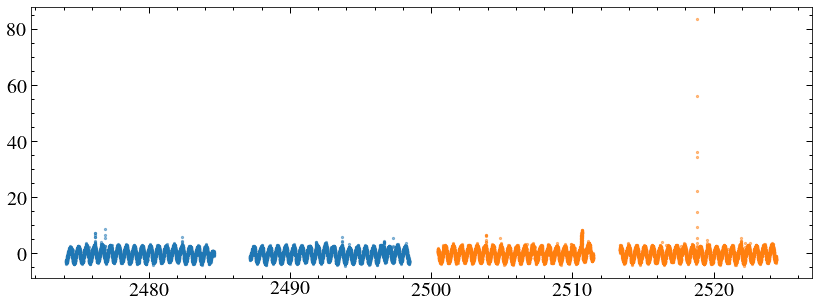

13.53000410125006 h
0.5637501708854192 d


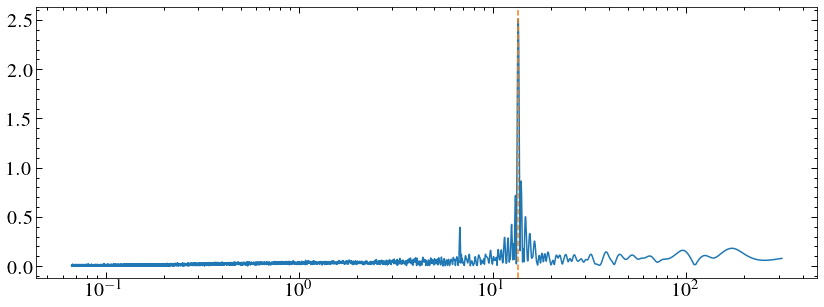

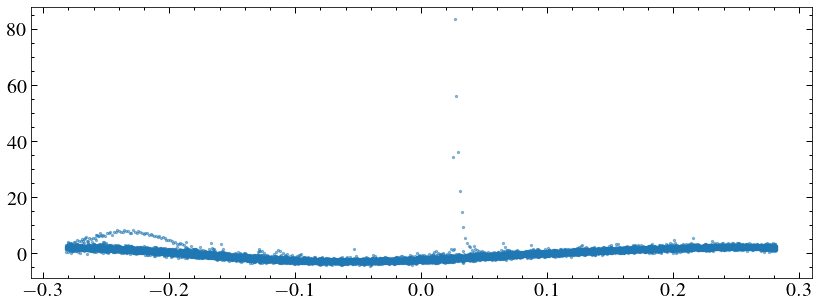

WD 1339+606


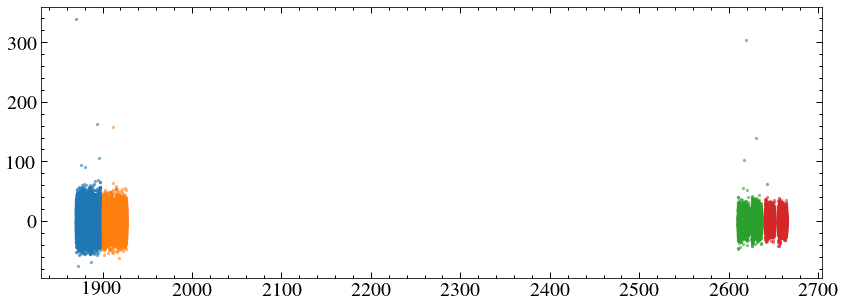

0.11935728443295515 h
0.004973220184706465 d


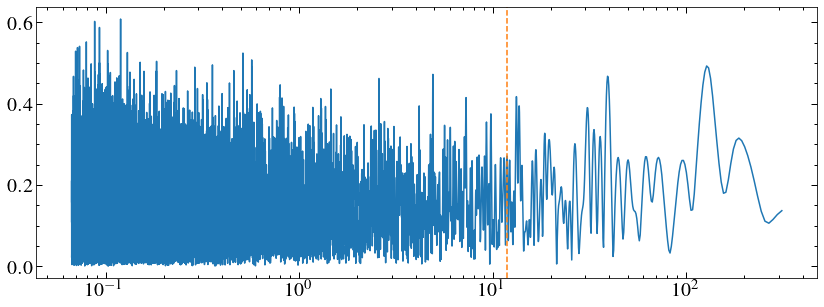

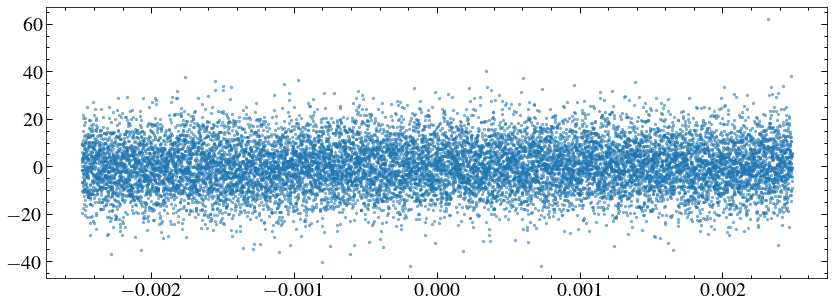

WD 1436-216


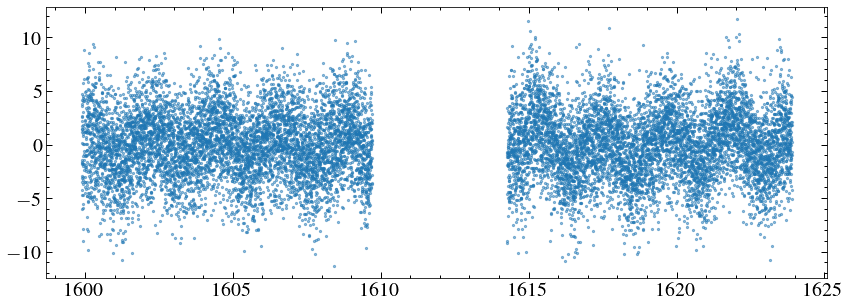

52.164797525588305 h
2.173533230232846 d


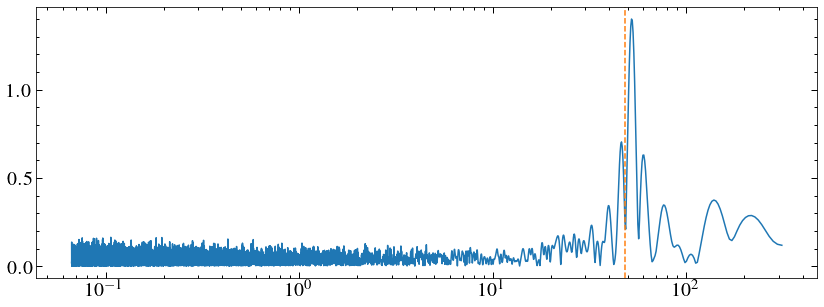

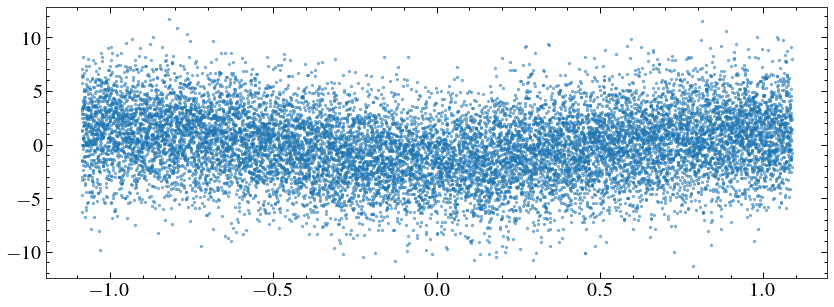

WD 1458+171
WD 1504+546
WD 2317+268
V727 Car


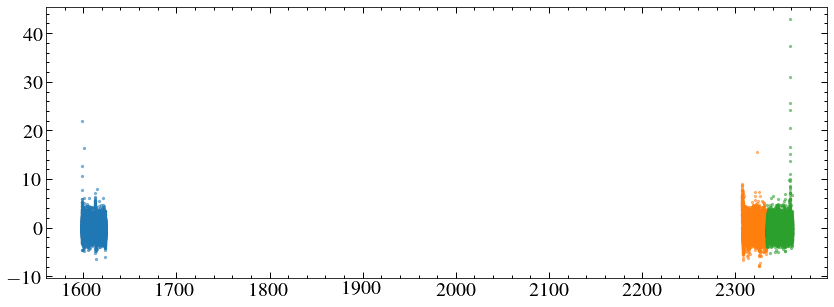

8.084108713203781 h
0.33683786305015756 d


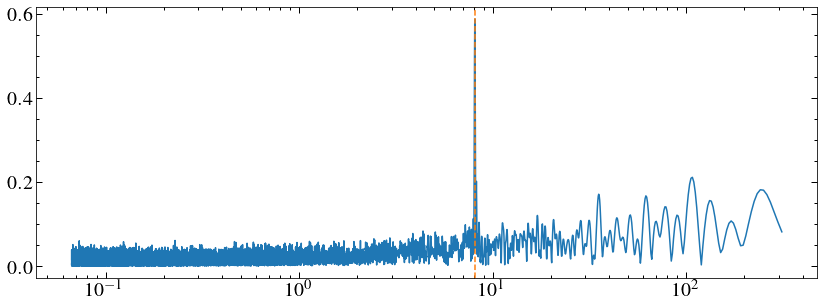

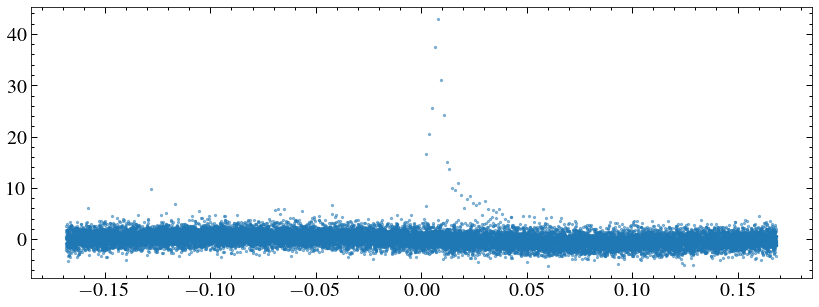

WD 0137-349


/home/david/anaconda3/envs/astroconda/lib/python3.7/site-packages/lightkurve/lightcurve.py:1048: LightkurveWarning: The light curve appears to be zero-centered (median=1.00e+00 electron / s +/- 2.77e+00 electron / s); `normalize()` will divide the light curve by a value close to zero, which is probably not what you want.
  LightkurveWarning,


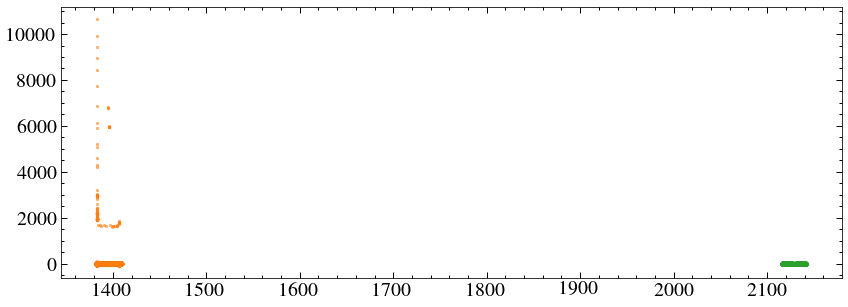

1.9060364626250892 h
0.07941818594271205 d


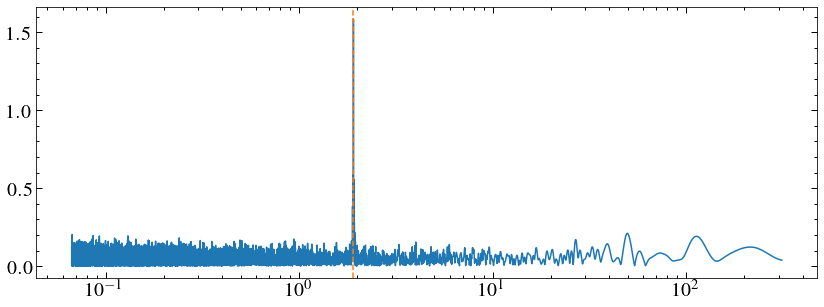

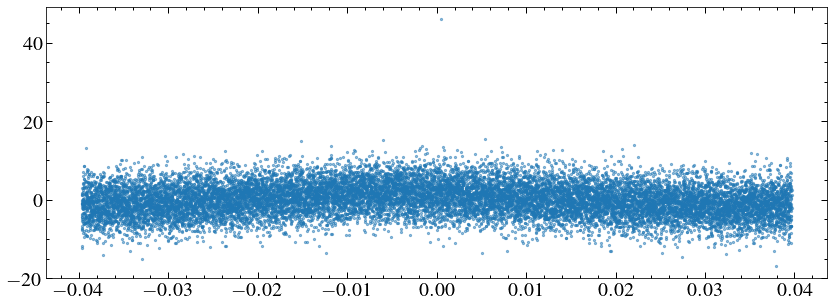

HRCam


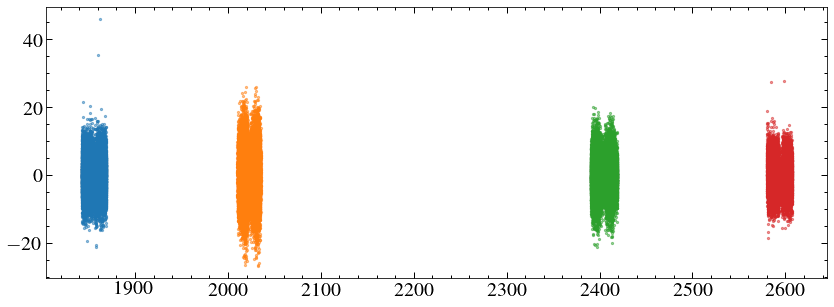

2.4739485455985553 h
0.10308118939993981 d


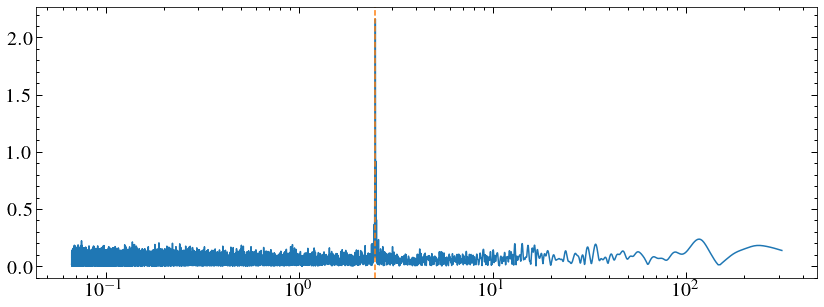

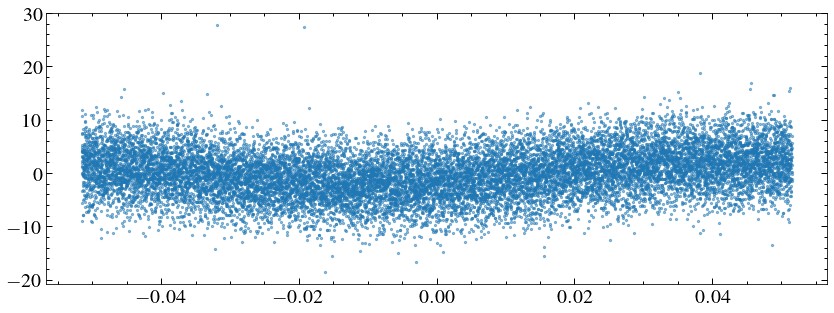

MS Peg
WD2257+162
QS Vir


In [4]:
for i, star in enumerate(coords['Name']):
    print(star)
    search_result = lk.search_lightcurve('{} {}'.format(ra[i], dec[i]))
    if len(search_result) > 0:
        for result in search_result:
            # print(result.exptime)
            n  = 0 
            if result.exptime.value == 120:
                lc = result[0].download(download_dir='data/')
                lc =lc.flatten(10001)
                lc = lc.normalize('percent')
                plt.scatter(lc.time.value, lc.flux.value-100, s=5, alpha = 0.5, rasterized=True)
                if n == 0:
                    lc_all = lc
                else:
                    lc_all.append(lc)
                n += 1
        plt.show()
        pg = lc_all.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.min, maximum_period = 13*u.d)
        plt.plot(pg.period.to(u.h), pg.power)
        plt.xscale('log')
        plt.axvline(coords['Period_d'][i]*u.d.to(u.h), ls='--', c='C1')
        print(pg.period_at_max_power.to(u.h))
        print(pg.period_at_max_power)
        plt.show()
        lcf = lc.fold(pg.period_at_max_power)
        plt.scatter(lcf.time.value, lcf.flux.value-100, s=5, alpha = 0.5, rasterized=True)
        

                
    # if star == b'CC Cet':
        # plt.xlim(2503, 2504)
        plt.show()
                
    

In [5]:
13025.5*u.s.to(u.d)

0.15075810185185184

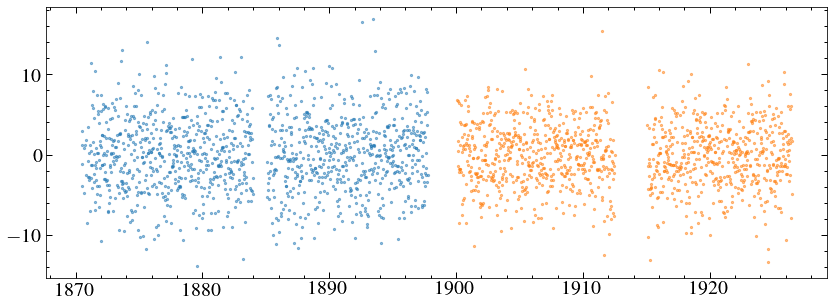

11.84784
4.567502431495598 h
0.19031260131231656 d


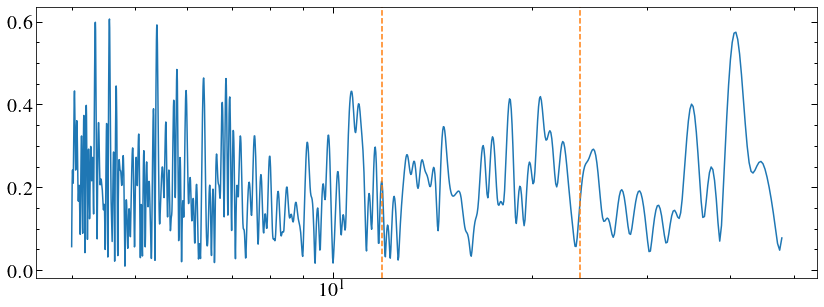

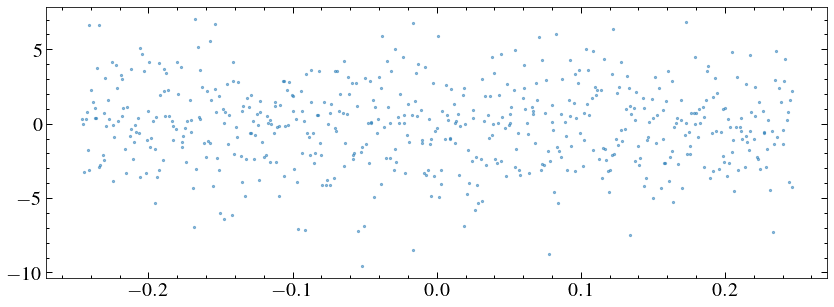

In [6]:
for i, star in enumerate(coords['Name']):
    # print(star)
    if star == 'WD 1339+606':
        search_result = lk.search_lightcurve('{} {}'.format(ra[i], dec[i]))
        if len(search_result) > 0:
            for result in search_result:
                # print(result.exptime)
                n  = 0 
                if result.exptime.value == 1800:
                    lc = result[0].download(download_dir='data/')
                    lc =lc.flatten(1001)
                    lc = lc.normalize('percent')
                    plt.scatter(lc.time.value, lc.flux.value-100, s=5, alpha = 0.5, rasterized=True)
                    if n == 0:
                        lc_all = lc
                    else:
                        lc_all.append(lc)
                    n += 1
            plt.show()
            lc = lc.bin(1*u.h)
            pg = pg = lc_all.to_periodogram(method='ls',oversample_factor=10, minimum_period=4*u.h, maximum_period = 2*u.d)
            plt.plot(pg.period.to(u.h), pg.power)
            plt.xscale('log')
            
            plt.axvline(coords['Period_d'][i]*u.d.to(u.h), ls='--', c='C1')
            plt.axvline(coords['Period_d'][i]*u.d.to(u.h)*2, ls='--', c='C1')
            print(coords['Period_d'][i]*u.d.to(u.h))
            print(pg.period_at_max_power.to(u.h))
            print(pg.period_at_max_power)
            # plt.sh


        # if star == b'CC Cet':
            # plt.xlim(2503, 2504)
            plt.show()
            
            lcf = lc.fold(coords['Period_d'][i]*u.d)
            plt.scatter(lcf.time.value, lcf.flux.value-100, s=5, alpha = 0.5, rasterized=True)
            plt.show()
         

